1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

69
60


Text(0.5, 1.0, 'N of atoms not decayed as function of time')

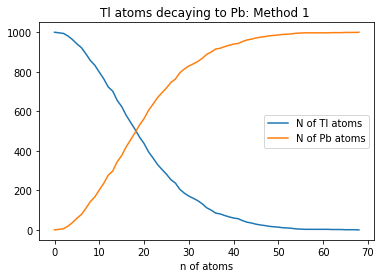

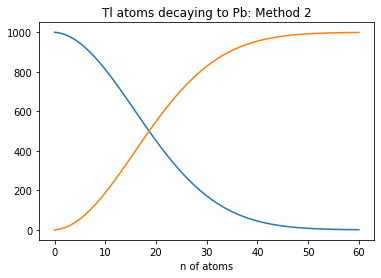

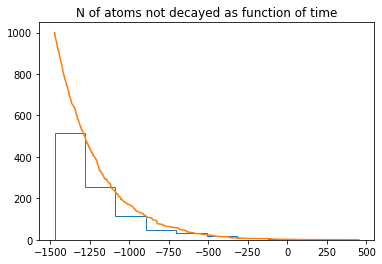

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


def p(t):
    tau=3.052*60
    return 1-2**(-t/tau)

Tl=[1000]
Pb=[0]

t=0
while Tl[-1]>0:
    t=t+1
    pt=p(t) #probability for this time step
    Tl_state=np.random.random(Tl[-1])
    tot_decay=sum(Tl_state<pt)  #decayed atoms
    Tl.append(Tl[-1]-tot_decay) #subtract decayed atoms to Tl
    Pb.append(Pb[-1]+tot_decay) #add decayed atoms to Pb

time_decay=np.arange(t+1)
plt.figure()
plt.plot(time_decay,Tl,label='N of Tl atoms')
plt.plot(time_decay,Pb,label='N of Pb atoms')
plt.xlabel('seconds')
plt.xlabel('n of atoms')
plt.legend()
plt.title('Tl atoms decaying to Pb: Method 1 ')

print(t+1)
#### alternative
tl=np.zeros(100)
pb=np.zeros(100)
tl[0]=1000

t=0
for i in range(1,100):
    t=t+1
    tl[i]=tl[i-1]*(1-p(t))
    pb[i]=pb[i-1]+tl[i-1]*p(t)
    
time=0
while tl[time]>1:
    time+=1

print(time)
plt.figure()
plt.plot(np.arange(time+1),tl[:time+1])
plt.plot(np.arange(time+1),pb[:time+1])
plt.xlabel('seconds')
plt.xlabel('n of atoms')
plt.title('Tl atoms decaying to Pb: Method 2')

#### Inverse transform method
def p2(t):
    tau = 3.052*60
    return  1-2**(-t/tau) #by analytical integration
#     return np.log(2)/tau*(2**(-t/tau))

def cdf(t):
    tau = 3.052*60 
#     return  1-2**(-t/tau) #by analytical integration
    return np.log(2)/tau*(2**(-t/tau))

def icdf(u):
    tau = 3.052*60 
    return -tau*np.log2(tau*u/np.log(2))
#     return  -tau*np.log2(1-u) 


N = 1000
xs = np.linspace(0,1000,1000)
us = np.random.random(N) #probabilities 
plt.figure()
plt.hist(icdf(us),histtype='step', bins=10);      #xs st F(xs)=us 
plt.plot(np.sort(icdf(us)), (1-(np.sort(us)))*N   )

plt.title("N of atoms not decayed as function of time")

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [3]:
Z = 79 
eps0 = 8.85e-12 
e = -1.6e-19 
E=7.7e6*abs(e)
a0 = 5.29e-11 
std = a0/100 
alpha = 1e6 #number of particles
eps0 = 8.85e-12 
e = -1.6e-19 

#box-muller
z = np.random.random(int(alpha))
theta = 2*np.pi*np.random.random(int(alpha))
r_squared = -2*np.log(z)
r = np.sqrt(-2*(std**2)*np.log(1-z))#r_squared)
x = r*np.cos(theta)*std
y = r*np.sin(theta)*std

coordinates = np.array(list(zip(x,y))) 
b = np.array(np.linalg.norm(coordinates, axis =1)) # distance from the center of the beam
theta = 2*np.arctan((Z*e**2 )/(2*np.pi*eps0*E*b)) 

back_particles = np.sum(theta>np.pi/2)/alpha

print('The percent of particles that are back scattered by the Gold atom is: '+str(back_particles*100)+' %')

The percent of particles that are back scattered by the Gold atom is: 100.0 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

In [54]:
def f(x):
    return (np.sin(1/(x*(x-2))))**2

x=np.linspace(0.001 , 1.999 , 1000)

### Estimation of the integral I_mc
A=max(f(x))*(x[-1]-x[0])
N=10000
xx=np.random.random(N)
yy=np.random.random(N)
count=0

for i in range(N):
    if yy[i]<f(A*xx[i]):
        count+=1
I_hm=A*count/N

### Real Integral (trapz function)
I=np.trapz(f(x),x)

err=np.abs(I-I_hm)
print('Error between theoretical integral and hit/miss method: |I-I_hm|= '+str(err))

#################### Mean Value Method

mean=sum(f(A*xx))/N
I_mv=mean*(x[-1]-x[0])
err=np.abs(I-I_mv)
print('Error between theoretical integral and mean value method: |I-I_mv|= '+str(err))

######### Integral Values 
print('Values:')
print('Trapz method integral: '+str(I))
print('Hit_Miss method integral: '+str(I_hm))
print('Mean value method integral: '+str(I_mv))

Error between theoretical integral and hit/miss method: |I-I_hm|= 0.005673139122624793
Error between theoretical integral and mean value method: |I-I_mv|= 0.004760799268062943
Values:
Trapz method integral: 1.4536232774304347
Hit_Miss method integral: 1.44795013830781
Mean value method integral: 1.4488624781623718


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [101]:
def f(x):
    return 1*(np.sum(x**2, axis=0) <=1)

#Theoretical Area expected = pi*(r)**2
pi=np.pi


N=100000
d=2 #diameter of unit circle
A=d**2
x=np.random.uniform(-1,1,size=(2,N))
I_2=A/N*np.sum(f(x))
print('Area of a 2D shpere of unit radius= '+str(I_2))
print('Error evaluation: |pi-I_2|= '+str(np.abs(pi-I_2)) )

###### 10-D shpere
A_10=d**10
x10=np.random.uniform(-1,1,size=(10,N))
I_10=A_10/N*np.sum(f(x10))
print('Area of a 10-D shpere of unit radius= '+str(I_10))


Area of a 2D shpere of unit radius= 3.14644
Error evaluation: |pi-I_2|= 0.00484734641020701
Area of a 10-D shpere of unit radius= 2.4883200000000003



5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [102]:
def f(x):
    return x**(-(1/2 ))/ (np.exp(x) + 1)
def w(x):
    return 1/np.sqrt(x)

N=100000
# weights
x=np.linspace(0,1,N)[1:] 
I_w=np.trapz(w(x),x)

#function
x=np.random.uniform(low=0.,high=1., size=(1,N))**2 #get more samples near zero
fw_avg=1/N*np.sum( f(x)/w(x) )
I=fw_avg*I_w
print('Value of the integral: '+str(I))

Value of the integral: 0.8360290357168962
